In [2]:
#Import libraries
import numpy as np
import pandas as pd
import os,time,gzip,pickle

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

In [37]:
#Load the datasets
current_path = os.getcwd()
file = '\\mnist_data\\mnist.pkl.gz'

f = gzip.open(current_path+file,'rb')
train_set,validation_set,test_set = pickle.load(f,encoding = 'latin1')
f.close()

X_train,y_train = train_set[0],train_set[1]
X_validation,y_validation = validation_set[0],validation_set[1]
X_test,y_test = test_set[0],test_set[1]

In [38]:
#Verify the shape of datasets
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_validation: ",X_validation.shape)
print("Shape of y_validation: ",y_validation.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [39]:
#Create pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train),len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation),\
                   len(X_train)+len(X_validation)+len(X_test))
X_train = pd.DataFrame(data = X_train,index = train_index)
y_train = pd.DataFrame(data = y_train,index = train_index)
X_validation = pd.DataFrame(data = X_validation,index = validation_index)
y_validation = pd.DataFrame(data = y_validation,index = validation_index)
X_test = pd.DataFrame(data = X_test,index = test_index)
y_test = pd.DataFrame(data = y_test,index = test_index)

In [40]:
#show the labels
y_train.head()

,0
0,5
1,0
2,4
3,1
4,9


In [41]:
#Display the images
def view_digit(example):
    label = y_train.loc[0]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d Label: %d'%(example,label))
    plt.imshow(image,cmap=plt.get_cmap('gray'))
    plt.show()

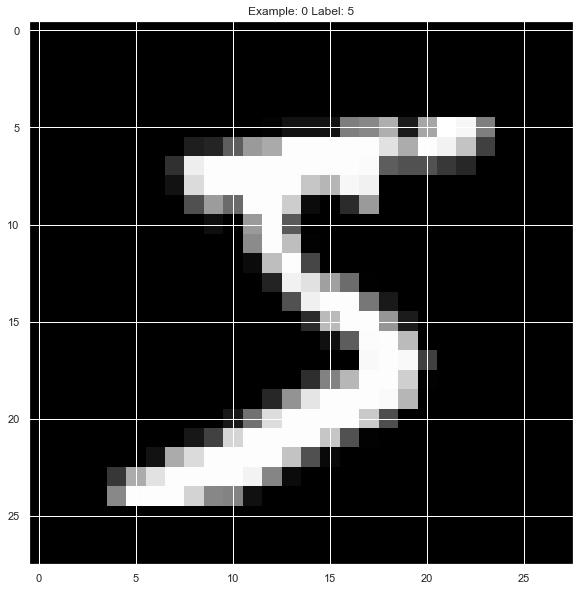

In [42]:
#once the 784-dimensional vector is reshaped into 28 * 28 pixel image 
#view the first digit
view_digit(0)

#PCA does this dimension reduction by addressing the correlation among the features.If the correlation is high among the subset of features,PCA will attempt to combine the highly correlated features and represnt this data with a smaller number of linearly uncorrealted features.

In our mnist example,the original feature space has 784 dimensions known as d dimensions.PCA will project the data onto a smaller subspace of k dimensions(where k < d) while retaining as much as salient information as possible.

It is essential to perform feature scaling before running PCA.PCA is very sensitive to the relative ranges of the original features.However for our mnist data features are already scaled up,so skip this step.

In [43]:
#Principal Component Analysis
#Linear dimensionality reduction using Singular Value Decomposition of the 
#data to project it to a lower dimensional space. The input data is centered 
#but not scaled
#for each feature before applying the SVD.
#n_components: int, float, None or str
#Number of components to keep. 
#if n_components is not set all components are kept:
'''copybool, default=True
If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.
whiten :bool, optional (default False)
When True (False by default) the components_ vectors are multiplied by 
the square root of n_samples and then divided by the singular values to 
ensure uncorrelated outputs with unit component-wise variances.
Whitening will remove some information from the transformed signal 
(the relative variance scales of the components) but can sometime improve 
the predictive accuracy of the downstream estimators by making their 
data respect some hard-wired assumptions.'''
from sklearn.decomposition import PCA
n_components = 784
whiten = False
random_state = 2018
pca = PCA(n_components= n_components,whiten = whiten,\
         random_state = random_state)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data = X_train_PCA,index = train_index)

In [44]:
#Evaluate PCA
#Percentage of Variance captured by 784 principal components
print("Variance Expalined by all 784 principal components:",\
     sum(pca.explained_variance_ratio_))

Variance Expalined by all 784 principal components: 0.9999999999999992


In [45]:
#Percentage of Variance Captured by X principal components
importanceofPrincipalComponents = \
pd.DataFrame(data = pca.explained_variance_ratio_)
importanceofPrincipalComponents=importanceofPrincipalComponents.T
print("Variance Captured by first 10 principal components:",\
      importanceofPrincipalComponents.loc[:,0:9].sum(axis = 1).values)
print("Variance Captured by first 20 principal components:",\
      importanceofPrincipalComponents.loc[:,0:19].sum(axis = 1).values)
print("Variance Captured by first 50 principal components:",\
      importanceofPrincipalComponents.loc[:,0:49].sum(axis = 1).values)
print("Variance Captured by first 100 principal components:",\
      importanceofPrincipalComponents.loc[:,0:99].sum(axis = 1).values)
print("Variance Captured by first 200 principal components:",\
      importanceofPrincipalComponents.loc[:,0:199].sum(axis = 1).values)
print("Variance Captured by first 300 principal components:",\
      importanceofPrincipalComponents.loc[:,0:299].sum(axis = 1).values)

Variance Captured by first 10 principal components: [0.48876238]
Variance Captured by first 20 principal components: [0.64398025]
Variance Captured by first 50 principal components: [0.8248609]
Variance Captured by first 100 principal components: [0.91465857]
Variance Captured by first 200 principal components: [0.96650076]
Variance Captured by first 300 principal components: [0.9862489]


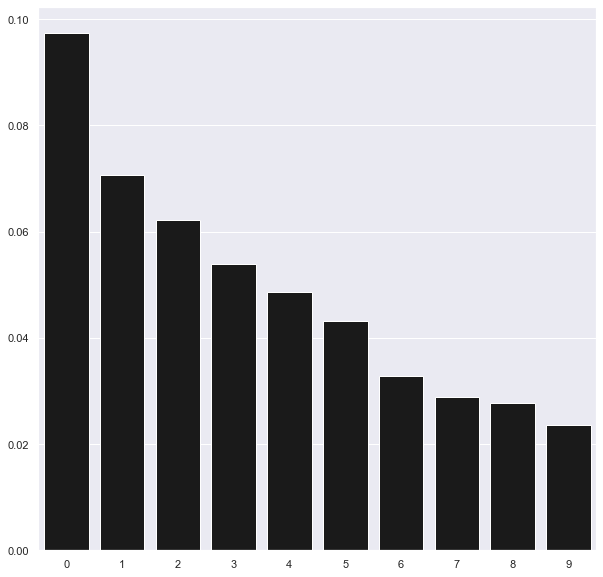

In [46]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(data = importanceofPrincipalComponents.loc[:,0:9],color = 'k')

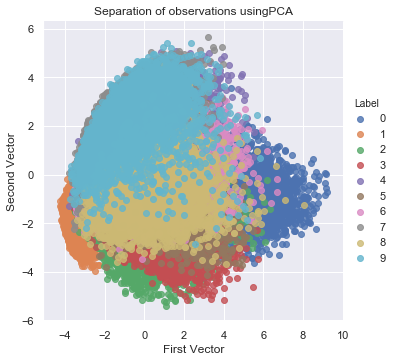

In [47]:
def scatterPlot(xDF,yDf,algoName):
    tempDF = pd.DataFrame(data =xDF.loc[:,0:1],index = xDF.index)
    tempDF = pd.concat((tempDF,yDf),axis = 1,join ='inner')
    tempDF.columns = ["First Vector","Second Vector","Label"]
    sns.lmplot(x = "First Vector",y = "Second Vector",hue = "Label",\
               data = tempDF,fit_reg = False)
    ax = plt.gca()
    ax.set_title("Separation of observations using"+algoName)
scatterPlot(X_train_PCA,y_train,"PCA")

PCA does a good job of separating the points in space such that similar points are generally closer to each other than they are to other,less similar points.In other words,images of the same digit are closer to each other than they are to images of other digits

PCA accomplishes this without using any labels whatsoever.

Text(0.5, 1, 'Separation of observations using Original Feature set')

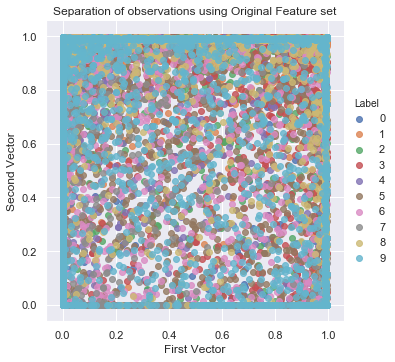

In [48]:
X_train_scatter = pd.DataFrame(data =X_train.loc[:,[350,406]],
                               index = X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train),axis = 1,join ='inner')
X_train_scatter.columns = ["First Vector","Second Vector","Label"]
sns.lmplot(x = "First Vector",y = "Second Vector",hue = "Label",\
               data =X_train_scatter,fit_reg = False)
ax = plt.gca()
ax.set_title("Separation of observations using Original Feature set")

#Not only does PCA help separate the data so that we can discover the hidden patterns more readily,it also helps in reducing the size of the feature set,making it less costly-both in time and in computational resources.

#Incremental PCA
For datasets that are very large and cannot fit in memory,we can perform PCA incrementally in small batches,where each batch is able to fit in memory.The batch size can be either set manually or determined automatically.This batch-based form of PCA is called Incremental PCA.The resultant principal components of PCA and Incremental PCA are generrally pretty similar.

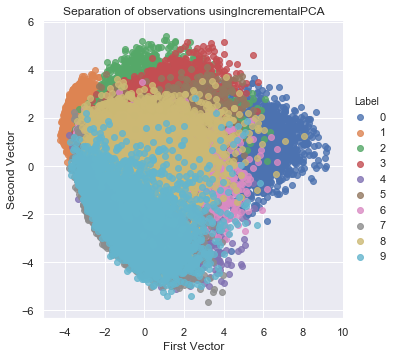

In [50]:
'''Incremental principal components analysis (IPCA).

Linear dimensionality reduction using Singular Value Decomposition of the data,
keeping only the most significant singular vectors to project the data to a 
lower dimensional space. The input data is centered but not scaled for each 
feature
before applying the SVD.

Depending on the size of the input data, this algorithm can be much 
more memory efficient than a PCA, and allows sparse input.

This algorithm has constant memory complexity, on the order of 
batch_size * n_features,'''

'''batch_size : int or None, (default=None)

The number of samples to use for each batch. Only used when calling fit. 
If batch_size is None, then batch_size is inferred from the data and 
set to 5 * n_features, to provide a 
balance between approximation accuracy and memory consumption'''

from sklearn.decomposition import IncrementalPCA
n_components = 784
batch_size = None
incrementalPCA = IncrementalPCA(n_components = n_components,\
batch_size = batch_size)
X_train_incrementalPCA  = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA  = \
pd.DataFrame(data =X_train_incrementalPCA,index = train_index)
X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = \
pd.DataFrame(data = X_validation_incrementalPCA,index = validation_index)

scatterPlot(X_train_incrementalPCA,y_train,"IncrementalPCA")

#Sparse PCA
The normal PCA algorithm searches for the linear combinations in all the input variables,reducing the original featue space as densely as possible.A version of PCA that retains some degree of sparsity - controlled by a hyperparameter (alpha) called SparsePCA.The sparse PCA algorithm searches for linear combinations in just some of the input variables,reducing the original feature space to some degree.
We wil train only 10,000 examples from the 50,000 examples.
#Sparse PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


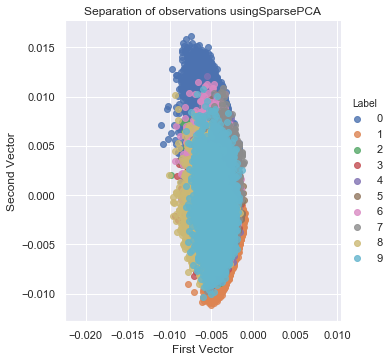

In [51]:
from sklearn.decomposition import SparsePCA
n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1
sparsePCA = SparsePCA(n_components = n_components,\
alpha = alpha,random_state = random_state,n_jobs=n_jobs)
sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA  = sparsePCA.transform(X_train)
X_train_sparsePCA  = \
pd.DataFrame(data =X_train_sparsePCA,index = train_index)
X_validation_sparsePCA =sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
pd.DataFrame(data = X_validation_sparsePCA,index = validation_index)
scatterPlot(X_train_sparsePCA,y_train,"SparsePCA")

#singular value decomposition
#to reduce the rank of the original matrix of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in smaller rank matrix.This is called Singular Value Decomposition(SVD)

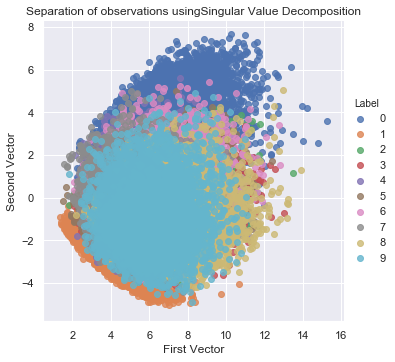

In [52]:
from sklearn.decomposition import TruncatedSVD
n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018
svd = TruncatedSVD(n_components = n_components,\
algorithm = algorithm,n_iter=n_iter,random_state = random_state)
X_train_svd=svd.fit_transform(X_train)
X_train_svd  = \
pd.DataFrame(data =X_train_svd,index = train_index)
X_validation_svd =svd.transform(X_validation)
X_validation_svd = \
pd.DataFrame(data = X_validation_svd,index = validation_index)
scatterPlot(X_train_svd,y_train,"Singular Value Decomposition")